In [3]:
import random
import numpy as np
import pandas as pd
import utilization_waiting as ut
from time import clock

clock()
nurse = 8
doctor = 4
patient = random.randint(15, 25)  # random variable
patient_nurse = int(patient * 0.2)  # patients only to see nurse
patient_nurse_doctor = patient - patient_nurse  # patients to see nurse & doctor

# (mean, sd, min, max) random variables indicating the time(minutes) a patient needs to spent with a nurse/doctor
mean_time = random.randint(25, 35)
sd = 1
min_time = mean_time - 10
max_time = mean_time + 10

# nurse only
total_nurseonly_time = ut.sum_truncnorm(mean_time, sd, min_time, max_time, patient_nurse)
# nurse and doctor
total_nursemix_time = ut.sum_truncnorm(mean_time, sd, min_time, max_time, patient_nurse_doctor)
total_doctor_time = ut.sum_truncnorm(mean_time, sd, min_time, max_time, patient_nurse_doctor)

# utilization
utilization_nurse = ut.rate((total_nurseonly_time + total_nursemix_time), nurse)
utilization_doctor = ut.rate((total_doctor_time), doctor)
print("\nThe utilization of nurse is {}%".format(round(utilization_nurse * 100), 2))
print("The utilization of doctor is {}%".format(round(utilization_doctor * 100), 2))


list_patient = []
for i in range(patient):
    list_patient.append('patient_{}'.format(i+1))

total_time = 60
random_arrival = [random.random() for i in range(patient)]
sum_arrival = sum(random_arrival)
arrival_time = [total_time * i / sum_arrival for i in random_arrival]

df_patients = pd.DataFrame({'Arrival_point': 0, 'Nurse_only': False,
                            'Waiting_nurse': 0, 'Meet_nurse_point': 0,
                            'Seeing_nurse': 0, 'After_nurse_point': 0,
                            'Waiting_doctor': 0, 'Meet_doctor_point': 0,
                            'Seeing_doctor': 0, 'After_doctor_point': 0}, index=list_patient)

for i in range(patient):
    df_patients.loc[list_patient[i], 'Arrival_point'] += sum(arrival_time[:i])

list_nurseonly_number = random.sample(list(range(patient)), patient_nurse)
for i in list_nurseonly_number:
    df_patients.loc['patient_{}'.format(i + 1), 'Nurse_only'] = True

arr_nurse = np.zeros(nurse)
arr_doctor = np.zeros(doctor)

df_patients['Seeing_nurse'] = ut.time_spend(mean_time, sd, min_time, max_time, patient)

for i in range(patient):
    if min(arr_nurse) <= df_patients.loc[list_patient[i], 'Arrival_point']:
        df_patients.loc[list_patient[i], 'Meet_nurse_point'] = df_patients.loc[list_patient[i], 'Arrival_point']
    else:
        df_patients.loc[list_patient[i], 'Meet_nurse_point'] = min(arr_nurse)
    df_patients.loc[list_patient[i], 'Waiting_nurse'] = df_patients.loc[list_patient[i], 'Meet_nurse_point'] - df_patients.loc[list_patient[i], 'Arrival_point']
    df_patients.loc[list_patient[i], 'After_nurse_point'] = df_patients.loc[list_patient[i], 'Meet_nurse_point'] + df_patients.loc[list_patient[i], 'Seeing_nurse']

    arr_nurse[np.argmin(arr_nurse)] += df_patients.loc[list_patient[i], 'Seeing_nurse']

list_nurseonly_patient = [p for p in df_patients[df_patients['Nurse_only'] == True].index]
for i in range(patient_nurse):
    df_patients.loc[list_nurseonly_patient[i], 'Waiting_doctor':'After_doctor_point'] = None   
    
list_mix_patient = [p for p in df_patients[df_patients['Nurse_only'] == False].index]
time_doctor = ut.time_spend(mean_time, sd, min_time, max_time, patient_nurse_doctor)
for i in range(patient_nurse_doctor):
    df_patients.loc[list_mix_patient[i], 'Seeing_doctor'] = time_doctor[i]

for i in range(patient_nurse_doctor):
    if min(arr_doctor) <= df_patients.loc[list_mix_patient[i], 'After_nurse_point']:
        df_patients.loc[list_mix_patient[i], 'Meet_doctor_point'] = df_patients.loc[list_mix_patient[i], 'After_nurse_point']
    else:
        df_patients.loc[list_mix_patient[i], 'Meet_doctor_point'] = min(arr_doctor)
    df_patients.loc[list_mix_patient[i], 'Waiting_doctor'] = df_patients.loc[list_mix_patient[i], 'Meet_doctor_point'] - df_patients.loc[list_mix_patient[i], 'After_nurse_point']
    arr_doctor[np.argmin(arr_doctor)] += df_patients.loc[list_mix_patient[i], 'Seeing_doctor']
    df_patients.loc[list_mix_patient[i], 'After_doctor_point'] = df_patients.loc[list_mix_patient[i], 'Meet_doctor_point'] + df_patients.loc[list_mix_patient[i], 'Seeing_doctor']


average_wait_nurse = round(df_patients['Waiting_nurse'].mean(), 2)
max_wait_nurse = round(df_patients['Waiting_nurse'].max(), 2)
average_wait_doctor = round(df_patients['Waiting_doctor'].sum() / patient_nurse_doctor, 2)
max_wait_doctor = round(df_patients['Waiting_doctor'].max(), 2)

print('\nThe average and maxium waiting time for nurse are {} minutes and {} minutes'.format(average_wait_nurse, max_wait_nurse))
print('The average and maxium waiting time for doctor are {} minutes and {} minutes'.format(average_wait_doctor, max_wait_doctor))

print('\nTotal running time is %-1.5ss' % clock())

df_patients


The utilization of nurse is 113.0%
The utilization of doctor is 188.0%

The average and maxium waiting time for nurse are 0.28 minutes and 3.9 minutes
The average and maxium waiting time for doctor are 0.52 minutes and 4.42 minutes

Total running time is 1.987s


,Arrival_point,Nurse_only,Waiting_nurse,Meet_nurse_point,Seeing_nurse,After_nurse_point,Waiting_doctor,Meet_doctor_point,Seeing_doctor,After_doctor_point
patient_1,0.000000,False,0.000000,0.000000,33.709001,33.709001,0.000000,33.709001,31.393801,65.102802
patient_2,1.870812,False,0.000000,1.870812,30.454382,32.325194,0.000000,32.325194,31.476493,63.801687
patient_3,2.910623,True,0.000000,2.910623,32.932516,35.843139,NaN,NaN,NaN,NaN
patient_4,6.661938,False,0.000000,6.661938,31.626734,38.288672,0.000000,38.288672,31.107695,69.396368
patient_5,9.967669,False,0.000000,9.967669,32.991834,42.959503,0.000000,42.959503,31.483363,74.442866
patient_6,14.698599,False,0.000000,14.698599,32.950291,47.648890,0.000000,47.648890,31.904217,79.553108
patient_7,18.939402,False,0.000000,18.939402,30.690967,49.630368,0.000000,49.630368,32.272329,81.902698
patient_8,23.414586,False,0.000000,23.414586,33.068165,56.482751,0.000000,56.482751,32.707782,89.190533
patient_9,29.577657,False,0.876725,30.454382,30.438710,60.893092,0.000000,60.893092,31.115949,92.009041
patient_10,32.954563,True,0.000000,32.954563,32.385730,65.340294,NaN,NaN,NaN,NaN


In [11]:
import random
import numpy as np
import pandas as pd
from scipy.stats import truncnorm
from time import clock


class TimeDistribution:

    def __init__(self, mean=0, sd=0, min=0, max=0, num=0):
        self.mean = mean
        self.sd = sd
        self.min = min
        self.max = max
        self.num = num

    def time_spend(self):
        generator = truncnorm((self.min-self.mean)/self.sd, (self.max-self.mean)/self.sd, loc=self.mean, scale=self.sd)
        time = generator.rvs(self.num)
        return time

    def sum_truncnorm(self):
        generator = truncnorm((self.min - self.mean) / self.sd, (self.max - self.mean) / self.sd, loc=self.mean, scale=self.sd)
        time = generator.rvs(self.num)
        return sum(time)

In [16]:
clock()
nurse = 8
doctor = 4
patient = random.randint(15, 25)  # random variable
patient_nurse = int(patient * 0.2)  # patients only to see nurse
patient_nurse_doctor = patient - patient_nurse  # patients to see nurse & doctor

# (mean, sd, min, max) random variables indicating the time(minutes) a patient needs to spent with a nurse/doctor
mean_time = random.randint(25, 35)
sd = 1
min_time = mean_time - 10
max_time = mean_time + 10

In [32]:
def utilization(mean_t, sd, min_t, max_t, nurse, doctor, patient, p_mix):

    total_nurse_time = TimeDistribution(mean_time, sd, min_time, max_time, patient).sum_truncnorm()
    total_doctor_time = TimeDistribution(mean_time, sd, min_time, max_time, p_mix).sum_truncnorm()

    utilization_nurse = total_nurse_time / (nurse * 60)
    utilization_doctor = total_doctor_time / (doctor * 60)

    return utilization_nurse, utilization_doctor


ut_nurse, ut_doctor = [], []
    
for i in range(2000):
    utilization_nurse, utilization_doctor = utilization(mean_time, sd, min_time, max_time, nurse, doctor, patient, patient_nurse_doctor)
    ut_nurse.append(utilization_nurse)
    ut_doctor.append(utilization_doctor)

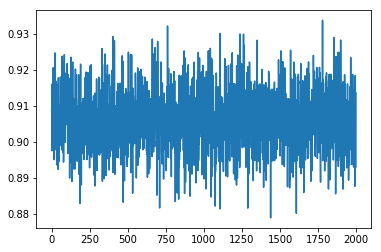

In [33]:
plt.plot(ut_nurse)
plt.show()

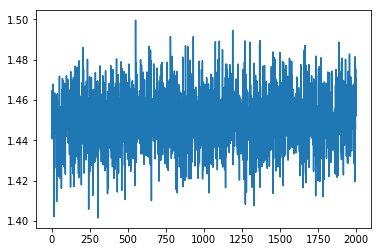

In [34]:
plt.plot(ut_doctor)
plt.show()

In [36]:
def wait_time(mean_time, sd, min_time, max_time, nurse, doctor, patient, p_nurseonly, p_mix):

    list_patient = []
    for i in range(patient):
        list_patient.append('patient_{}'.format(i+1))

    total_time = 60
    random_arrival = [random.random() for i in range(patient)]
    sum_arrival = sum(random_arrival)
    arrival_time = [total_time * i / sum_arrival for i in random_arrival]

    df_patients = pd.DataFrame({'Arrival_point': 0, 'Nurse_only': False,
                                'Waiting_nurse': 0, 'Meet_nurse_point': 0,
                                'Seeing_nurse': 0, 'After_nurse_point': 0,
                                'Waiting_doctor': 0, 'Meet_doctor_point': 0,
                                'Seeing_doctor': 0, 'After_doctor_point': 0}, index=list_patient)

    for i in range(patient):
        df_patients.loc[list_patient[i], 'Arrival_point'] += sum(arrival_time[:i])

    list_nurseonly_number = random.sample(list(range(patient)), p_nurseonly)
    for i in list_nurseonly_number:
        df_patients.loc['patient_{}'.format(i + 1), 'Nurse_only'] = True

    arr_nurse = np.zeros(nurse)
    arr_doctor = np.zeros(doctor)

    df_patients['Seeing_nurse'] = TimeDistribution(mean_time, sd, min_time, max_time, patient).time_spend()

    for i in range(patient):
        if min(arr_nurse) <= df_patients.loc[list_patient[i], 'Arrival_point']:
            df_patients.loc[list_patient[i], 'Meet_nurse_point'] = df_patients.loc[list_patient[i], 'Arrival_point']
        else:
            df_patients.loc[list_patient[i], 'Meet_nurse_point'] = min(arr_nurse)
        df_patients.loc[list_patient[i], 'Waiting_nurse'] = df_patients.loc[list_patient[i], 'Meet_nurse_point'] - df_patients.loc[list_patient[i], 'Arrival_point']
        df_patients.loc[list_patient[i], 'After_nurse_point'] = df_patients.loc[list_patient[i], 'Meet_nurse_point'] + df_patients.loc[list_patient[i], 'Seeing_nurse']

        arr_nurse[np.argmin(arr_nurse)] += df_patients.loc[list_patient[i], 'Seeing_nurse']

    list_nurseonly_patient = [p for p in df_patients[df_patients['Nurse_only'] == True].index]
    for i in range(p_nurseonly):
        df_patients.loc[list_nurseonly_patient[i], 'Waiting_doctor':'After_doctor_point'] = None

    list_mix_patient = [p for p in df_patients[df_patients['Nurse_only'] == False].index]
    time_doctor = TimeDistribution(mean_time, sd, min_time, max_time, p_mix).time_spend()
    for i in range(p_mix):
        df_patients.loc[list_mix_patient[i], 'Seeing_doctor'] = time_doctor[i]

    for i in range(p_mix):
        if min(arr_doctor) <= df_patients.loc[list_mix_patient[i], 'After_nurse_point']:
            df_patients.loc[list_mix_patient[i], 'Meet_doctor_point'] = df_patients.loc[list_mix_patient[i], 'After_nurse_point']
        else:
            df_patients.loc[list_mix_patient[i], 'Meet_doctor_point'] = min(arr_doctor)
        df_patients.loc[list_mix_patient[i], 'Waiting_doctor'] = df_patients.loc[list_mix_patient[i], 'Meet_doctor_point'] - df_patients.loc[list_mix_patient[i], 'After_nurse_point']
        arr_doctor[np.argmin(arr_doctor)] += df_patients.loc[list_mix_patient[i], 'Seeing_doctor']
        df_patients.loc[list_mix_patient[i], 'After_doctor_point'] = df_patients.loc[list_mix_patient[i], 'Meet_doctor_point'] + df_patients.loc[list_mix_patient[i], 'Seeing_doctor']

    average_wait_nurse = round(df_patients['Waiting_nurse'].mean(), 2)
    max_wait_nurse = round(df_patients['Waiting_nurse'].max(), 2)
    average_wait_doctor = round(df_patients['Waiting_doctor'].sum() / p_mix, 2)
    max_wait_doctor = round(df_patients['Waiting_doctor'].max(), 2)

    return average_wait_nurse, max_wait_nurse, average_wait_doctor, max_wait_doctor, df_patients

In [37]:
wait_time(mean_time, sd, min_time, max_time, nurse, doctor, patient, patient_nurse, patient_nurse_doctor)[-1]

,Arrival_point,Nurse_only,Waiting_nurse,Meet_nurse_point,Seeing_nurse,After_nurse_point,Waiting_doctor,Meet_doctor_point,Seeing_doctor,After_doctor_point
patient_1,0.000000,False,0.0,0.000000,29.179823,29.179823,0.0,29.179823,30.038252,59.218074
patient_2,3.122725,False,0.0,3.122725,29.663217,32.785943,0.0,32.785943,28.045542,60.831485
patient_3,10.636043,True,0.0,10.636043,27.690214,38.326257,NaN,NaN,NaN,NaN
patient_4,14.606056,False,0.0,14.606056,28.492605,43.098661,0.0,43.098661,29.023954,72.122615
patient_5,16.643635,False,0.0,16.643635,28.505193,45.148828,0.0,45.148828,28.551981,73.700809
patient_6,21.521346,False,0.0,21.521346,27.583198,49.104543,0.0,49.104543,28.378771,77.483314
patient_7,26.124991,False,0.0,26.124991,31.207347,57.332338,0.0,57.332338,30.629578,87.961916
patient_8,32.805064,False,0.0,32.805064,27.808148,60.613211,0.0,60.613211,28.502417,89.115628
patient_9,40.521800,False,0.0,40.521800,30.228215,70.750015,0.0,70.750015,29.199310,99.949325
patient_10,42.722532,False,0.0,42.722532,28.387553,71.110085,0.0,71.110085,29.935235,101.045320


In [54]:
ave_nurse, max_nurse, ave_doctor, max_doctor = [], [], [], []
for i in range(20000):
    ave_n, max_n, ave_d, max_d = wait_time(mean_time, sd, min_time, max_time, nurse, doctor, patient, patient_nurse, patient_nurse_doctor)[:4]
    ave_nurse.append(ave_n)
    max_nurse.append(max_n)
    ave_doctor.append(ave_d)
    max_doctor.append(max_d)

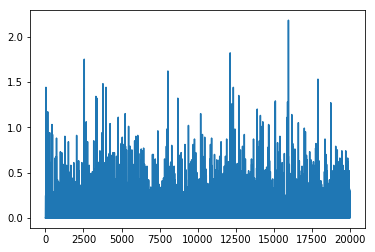

In [55]:
plt.plot(ave_nurse)
plt.show()

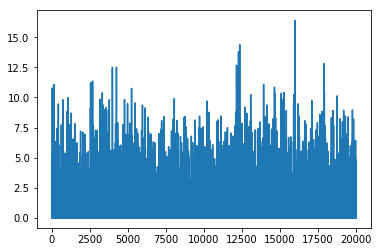

In [56]:
plt.plot(max_nurse)
plt.show()

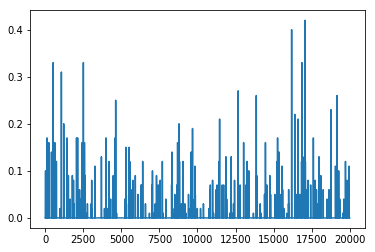

In [57]:
plt.plot(ave_doctor)
plt.show()

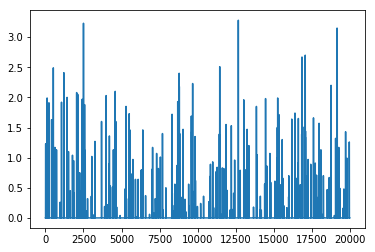

In [58]:
plt.plot(max_doctor)
plt.show()